Polynomial Regression

Polynomial regression is a type of regression analysis that models the relationship between a dependent variable (y) and one or more independent variables (x) using a polynomial equation.

What is Polynomial Regression?

Polynomial regression is a form of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled using a polynomial equation of a specified degree. The goal is to find the best-fitting polynomial curve that predicts the value of y based on the values of x.

Why Use Polynomial Regression?

1. Modeling Non-Linear Relationships: Polynomial regression can model non-linear relationships between variables, which is useful when the relationship is not linear.
2. Flexibility: Polynomial regression can fit a wide range of curves, making it a flexible tool for modeling complex relationships.
3. Prediction: Polynomial regression can be used to make predictions about future values of the dependent variable based on past data.

Why Do We Need Polynomial Regression?

1. Real-World Relationships are Often Non-Linear: Many real-world relationships are non-linear, and polynomial regression provides a way to model these relationships.
2. Improved Accuracy: Polynomial regression can provide more accurate predictions than linear regression when the relationship is non-linear.
3. Flexibility in Modeling: Polynomial regression allows for the modeling of complex relationships between variables, which can be useful in a wide range of applications.

When to Use Polynomial Regression:

1. Non-Linear Relationships: Use polynomial regression when the relationship between the independent variable(s) and the dependent variable is non-linear.
2. Complex Relationships: Use polynomial regression when the relationship between the variables is complex and cannot be modeled using a linear equation.
3. Prediction: Use polynomial regression when you need to make predictions about future values of the dependent variable based on past data.

Common Applications:

1. Predicting Continuous Outcomes: Polynomial regression is often used to predict continuous outcomes, such as stock prices or temperatures.
2. Modeling Complex Relationships: Polynomial regression can be used to model complex relationships between variables in fields such as economics, physics, and engineering.
3. Data Analysis: Polynomial regression is a useful tool for data analysis, allowing you to model and understand complex relationships in data.

 Mean Squared Error: 0.6885018093460118
 R² Score: 0.4745901311892258


/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


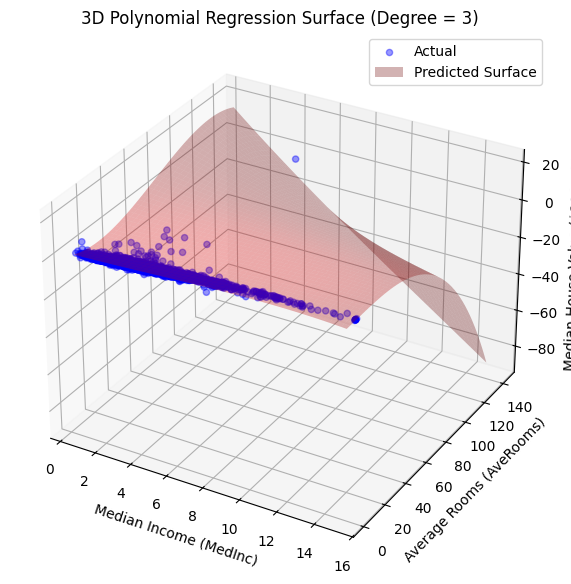

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Use two most relevant features
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree = 3 or 4)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict
y_pred = model.predict(X_poly_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Mean Squared Error:", mse)
print(" R² Score:", r2)

# Create a mesh grid for visualization
x_surf, y_surf = np.meshgrid(
    np.linspace(X['MedInc'].min(), X['MedInc'].max(), 50),
    np.linspace(X['AveRooms'].min(), X['AveRooms'].max(), 50)
)
xy_surf = np.c_[x_surf.ravel(), y_surf.ravel()]
xy_poly = poly.transform(xy_surf)
z_pred = model.predict(xy_poly).reshape(x_surf.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['MedInc'], X_test['AveRooms'], y_test, color='blue', label='Actual', alpha=0.4)
ax.plot_surface(x_surf, y_surf, z_pred, color='red', alpha=0.3, label='Predicted Surface')

ax.set_xlabel('Median Income (MedInc)')
ax.set_ylabel('Average Rooms (AveRooms)')
ax.set_zlabel('Median House Value ($100,000s)')
ax.set_title('3D Polynomial Regression Surface (Degree = 3)')
plt.legend()
plt.show()


In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
